<a href="https://colab.research.google.com/github/BVika/IIS/blob/main/lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вариант 24
## Задача: Управление кондиционером в помещении

Суть задачи: Система должна управлять работой кондиционера в зависимости от температуры в
помещении, заданной температуры, уровня влажности и времени суток. Цель — поддерживать
комфортные условия для проживания.
Условия:
1. Если температура в помещении выше заданной температуры, необходимо включить
кондиционер.
2. Если температура в помещении близка к заданной (в пределах 2°C), поддерживать текущий
режим работы кондиционера.
3. Если влажность высокая, необходимо увеличить производительность кондиционера для
снижения влажности.
4. Если температура в помещении ниже заданной температуры, кондиционер не должен
работать.
5. В ночное время (с 22:00 до 6:00) необходимо снизить мощность кондиционера для
экономии энергии.
Входные переменные:
  1. Температура в помещении (room_temp):
---
    • Низкая (менее 20°C)
    • Умеренная (20-25°C)
    • Высокая (более 25°C)

2. Заданная температура (set_temp):
---
    • Низкая (менее 20°C)
    • Умеренная (20-25°C)
    • Высокая (более 25°C)

3. Уровень влажности (humidity):
---
    • Низкая (менее 30%)
    • Средняя (30-70%)
    • Высокая (более 70%)

4. Время суток (time_of_day):
---
    • Ночь (0-6, 22-24)
    • Утро (6-12)
    • День (12-18)
    • Вечер (18-22)

Выходная переменная:
1. Работа кондиционера (ac_power):
---
    • Выключен (Off)
    • Низкая мощность (Low)
    • Средняя мощность (Medium)
    • Высокая мощность (High)



Пример правил:
1. Если температура в помещении выше заданной и уровень влажности высокий, установить
высокую мощность кондиционера.
2. Если температура в помещении ниже заданной, выключить кондиционер.
3. Если температура в помещении близка к заданной и время суток — ночь, установить
низкую мощность кондиционера.
4. Если температура в помещении высока, а время суток — день, установить среднюю
мощность кондиционера.
5. Если влажность высокая, а время суток — вечер, установить высокую мощность
кондиционера.

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 15.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuz
from skfuzzy import control as ctrl

In [3]:
# 1. Определяем входные и выходные переменные
room_temp = ctrl.Antecedent(np.arange(15, 36, 1), "room_temp")
set_temp = ctrl.Antecedent(np.arange(15, 36, 1), "set_temp")
humidity = ctrl.Antecedent(np.arange(0, 101, 1), "humidity")
time_of_day = ctrl.Antecedent(np.arange(0, 25, 1), "time_of_day")
ac_power = ctrl.Consequent(np.arange(0, 101, 1), "ac_power")

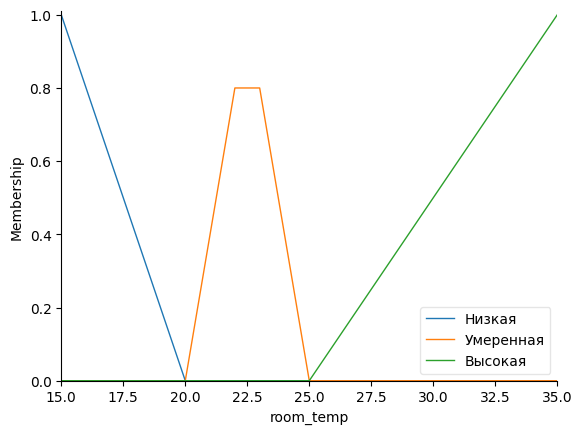

In [14]:
# 2. Функции принадлежности (треугольные)
room_temp['Низкая'] = fuz.trimf(room_temp.universe, [15, 15, 20])
room_temp['Умеренная'] = fuz.trimf(room_temp.universe, [20, 22.5, 25])
room_temp['Высокая'] = fuz.trimf(room_temp.universe, [25, 35, 35])

room_temp.view()


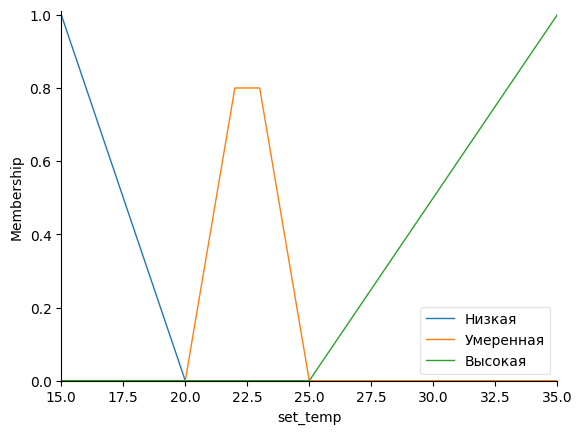

In [16]:
set_temp['Низкая'] = fuz.trimf(set_temp.universe, [15, 15, 20])
set_temp['Умеренная'] = fuz.trimf(set_temp.universe, [20, 22.5, 25])
set_temp['Высокая'] = fuz.trimf(set_temp.universe, [25, 35, 35])
set_temp.view()


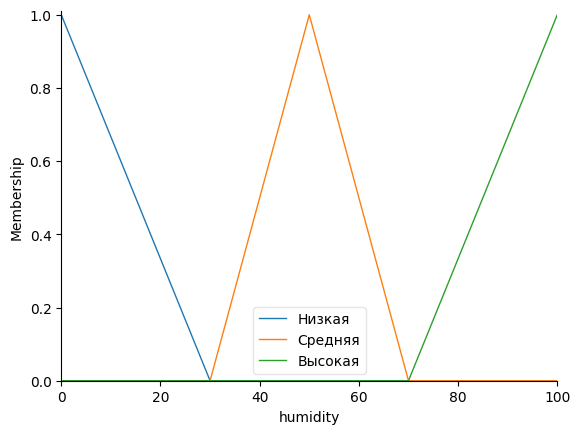

In [18]:
humidity['Низкая'] = fuz.trimf(humidity.universe, [0, 0, 30])
humidity['Средняя'] = fuz.trimf(humidity.universe, [30, 50, 70])
humidity['Высокая'] = fuz.trimf(humidity.universe, [70, 100, 100])

humidity.view()

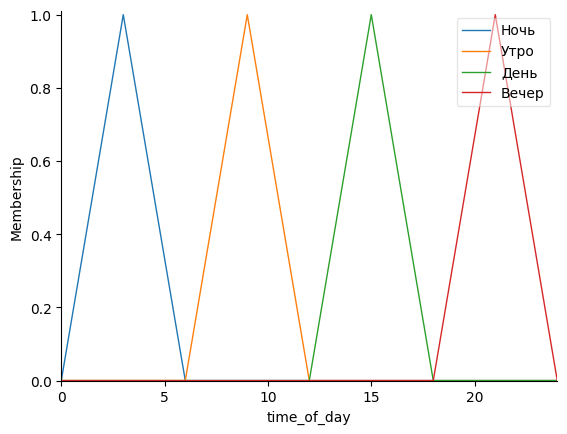

In [17]:
time_of_day['Ночь'] = fuz.trimf(time_of_day.universe, [0, 3, 6])  # Расширим для 22-24, но для простоты один пик
time_of_day['Утро'] = fuz.trimf(time_of_day.universe, [6, 9, 12])
time_of_day['День'] = fuz.trimf(time_of_day.universe, [12, 15, 18])
time_of_day['Вечер'] = fuz.trimf(time_of_day.universe, [18, 21, 24])
time_of_day.view()


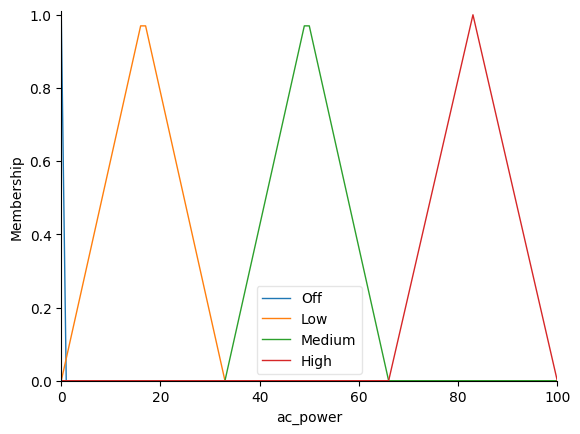

In [19]:
# Выходная переменная
ac_power['Off'] = fuz.trimf(ac_power.universe, [0, 0, 0])
ac_power['Low'] = fuz.trimf(ac_power.universe, [0, 16.5, 33])
ac_power['Medium'] = fuz.trimf(ac_power.universe, [33, 49.5, 66])
ac_power['High'] = fuz.trimf(ac_power.universe, [66, 83, 100])
ac_power.view()

In [20]:
# 3. Правила (адаптированные на основе условий)
rule1 = ctrl.Rule(room_temp['Высокая'] & set_temp['Низкая'] & humidity['Высокая'], ac_power['High'])  # Выше заданной + высокая влажность
rule2 = ctrl.Rule(room_temp['Низкая'] & set_temp['Высокая'], ac_power['Off'])  # Ниже заданной
rule3 = ctrl.Rule(room_temp['Умеренная'] & set_temp['Умеренная'] & time_of_day['Ночь'], ac_power['Low'])  # Близка + ночь
rule4 = ctrl.Rule(room_temp['Высокая'] & time_of_day['День'], ac_power['Medium'])  # Высокая temp + день
rule5 = ctrl.Rule(humidity['Высокая'] & time_of_day['Вечер'], ac_power['High'])  # Высокая влажность + вечер



In [21]:
# 4. Система управления
ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
ac_sim = ctrl.ControlSystemSimulation(ac_ctrl)

In [22]:
# 5. Входные значения
ac_sim.input['room_temp'] = 28
ac_sim.input['set_temp'] = 22
ac_sim.input['humidity'] = 80
ac_sim.input['time_of_day'] = 14

In [23]:
# 6. Вычисление
ac_sim.compute()

In [24]:

# 7. Вывод
print(f"Мощность кондиционера: {ac_sim.output['ac_power']:.2f} (0=Off, 100=High)")

Мощность кондиционера: 49.50 (0=Off, 100=High)


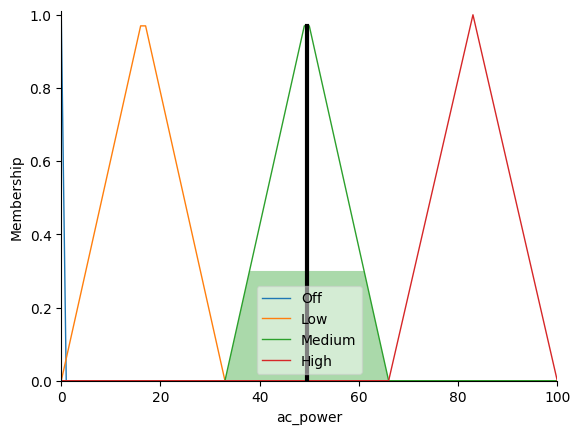

In [25]:
# Визуализация
ac_power.view(sim=ac_sim)

 Трапецевидная

Мощность кондиционера: 46.82 (0=Off, 100=High)


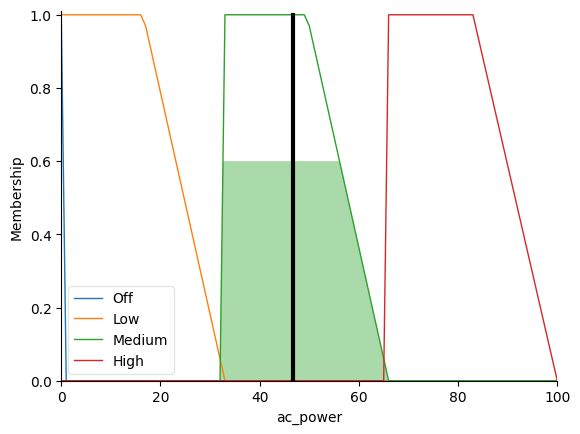

In [27]:
# 1. Определяем входные и выходные переменные
room_temp = ctrl.Antecedent(np.arange(15, 36, 1), "room_temp")
set_temp = ctrl.Antecedent(np.arange(15, 36, 1), "set_temp")
humidity = ctrl.Antecedent(np.arange(0, 101, 1), "humidity")
time_of_day = ctrl.Antecedent(np.arange(0, 25, 1), "time_of_day")
ac_power = ctrl.Consequent(np.arange(0, 101, 1), "ac_power")

# 2. Функции принадлежности (все трапецевидные)
room_temp['Низкая'] = fuz.trapmf(room_temp.universe, [15, 15, 20, 20])
room_temp['Умеренная'] = fuz.trapmf(room_temp.universe, [20, 22.5, 25, 27.5])
room_temp['Высокая'] = fuz.trapmf(room_temp.universe, [25, 30, 35, 35])

set_temp['Низкая'] = fuz.trapmf(set_temp.universe, [15, 15, 20, 20])
set_temp['Умеренная'] = fuz.trapmf(set_temp.universe, [20, 22.5, 25, 27.5])
set_temp['Высокая'] = fuz.trapmf(set_temp.universe, [25, 30, 35, 35])

humidity['Низкая'] = fuz.trapmf(humidity.universe, [0, 0, 30, 40])
humidity['Средняя'] = fuz.trapmf(humidity.universe, [30, 50, 70, 80])
humidity['Высокая'] = fuz.trapmf(humidity.universe, [70, 80, 100, 100])

time_of_day['Ночь'] = fuz.trapmf(time_of_day.universe, [0, 0, 6, 8])  # Расширен для покрытия 22-24, но адаптирован
time_of_day['Утро'] = fuz.trapmf(time_of_day.universe, [6, 9, 12, 15])
time_of_day['День'] = fuz.trapmf(time_of_day.universe, [12, 15, 18, 21])
time_of_day['Вечер'] = fuz.trapmf(time_of_day.universe, [18, 21, 24, 24])

# Выходная переменная (трапецевидная)
ac_power['Off'] = fuz.trapmf(ac_power.universe, [0, 0, 0, 0])
ac_power['Low'] = fuz.trapmf(ac_power.universe, [0, 0, 16.5, 33])
ac_power['Medium'] = fuz.trapmf(ac_power.universe, [33, 33, 49.5, 66])
ac_power['High'] = fuz.trapmf(ac_power.universe, [66, 66, 83, 100])

# 3. Правила (адаптированные на основе условий)
rule1 = ctrl.Rule(room_temp['Высокая'] & set_temp['Низкая'] & humidity['Высокая'], ac_power['High'])  # Выше заданной + высокая влажность
rule2 = ctrl.Rule(room_temp['Низкая'] & set_temp['Высокая'], ac_power['Off'])  # Ниже заданной
rule3 = ctrl.Rule(room_temp['Умеренная'] & set_temp['Умеренная'] & time_of_day['Ночь'], ac_power['Low'])  # Близка + ночь
rule4 = ctrl.Rule(room_temp['Высокая'] & time_of_day['День'], ac_power['Medium'])  # Высокая temp + день
rule5 = ctrl.Rule(humidity['Высокая'] & time_of_day['Вечер'], ac_power['High'])  # Высокая влажность + вечер


# 4. Система управления
ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
ac_sim = ctrl.ControlSystemSimulation(ac_ctrl)

# 5. Входные значения
ac_sim.input['room_temp'] = 28
ac_sim.input['set_temp'] = 22
ac_sim.input['humidity'] = 80
ac_sim.input['time_of_day'] = 14

# 6. Вычисление
ac_sim.compute()

# 7. Вывод
print(f"Мощность кондиционера: {ac_sim.output['ac_power']:.2f} (0=Off, 100=High)")

# Визуализация
ac_power.view(sim=ac_sim)

 Функция Гаусса

Мощность кондиционера: 58.26 (0=Off, 100=High)


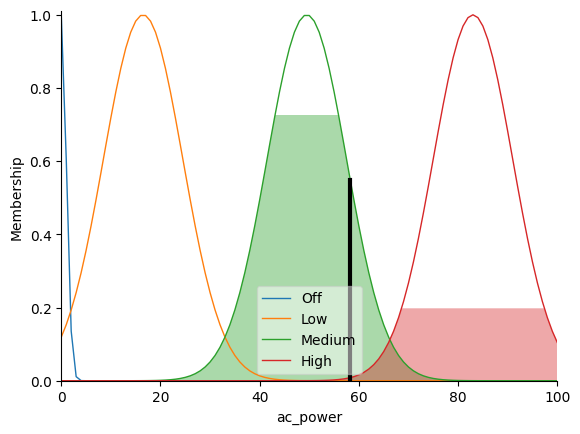

In [28]:
# 1. Определяем входные и выходные переменные
room_temp = ctrl.Antecedent(np.arange(15, 36, 1), "room_temp")
set_temp = ctrl.Antecedent(np.arange(15, 36, 1), "set_temp")
humidity = ctrl.Antecedent(np.arange(0, 101, 1), "humidity")
time_of_day = ctrl.Antecedent(np.arange(0, 25, 1), "time_of_day")
ac_power = ctrl.Consequent(np.arange(0, 101, 1), "ac_power")

# 2. Функции принадлежности (все Гауссовы)
#mean = (15+20)/2
#q=5/2
room_temp['Низкая'] = fuz.gaussmf(room_temp.universe, mean=17.5, sigma=2.5)
room_temp['Умеренная'] = fuz.gaussmf(room_temp.universe, mean=22.5, sigma=2.5)
room_temp['Высокая'] = fuz.gaussmf(room_temp.universe, mean=30, sigma=2.5)

set_temp['Низкая'] = fuz.gaussmf(set_temp.universe, mean=17.5, sigma=2.5)
set_temp['Умеренная'] = fuz.gaussmf(set_temp.universe, mean=22.5, sigma=2.5)
set_temp['Высокая'] = fuz.gaussmf(set_temp.universe, mean=30, sigma=2.5)

humidity['Низкая'] = fuz.gaussmf(humidity.universe, mean=15, sigma=7.5)
humidity['Средняя'] = fuz.gaussmf(humidity.universe, mean=50, sigma=10)
humidity['Высокая'] = fuz.gaussmf(humidity.universe, mean=85, sigma=7.5)

time_of_day['Ночь'] = fuz.gaussmf(time_of_day.universe, mean=3, sigma=2)  # Центр вокруг 0-6
time_of_day['Утро'] = fuz.gaussmf(time_of_day.universe, mean=9, sigma=2)
time_of_day['День'] = fuz.gaussmf(time_of_day.universe, mean=15, sigma=2)
time_of_day['Вечер'] = fuz.gaussmf(time_of_day.universe, mean=21, sigma=2)

# Выходная переменная (Гауссова)
ac_power['Off'] = fuz.gaussmf(ac_power.universe, mean=0, sigma=1)
ac_power['Low'] = fuz.gaussmf(ac_power.universe, mean=16.5, sigma=8)
ac_power['Medium'] = fuz.gaussmf(ac_power.universe, mean=49.5, sigma=8)
ac_power['High'] = fuz.gaussmf(ac_power.universe, mean=83, sigma=8)

# 3. Правила (адаптированные на основе условий)
rule1 = ctrl.Rule(room_temp['Высокая'] & set_temp['Низкая'] & humidity['Высокая'], ac_power['High'])  # Выше заданной + высокая влажность
rule2 = ctrl.Rule(room_temp['Низкая'] & set_temp['Высокая'], ac_power['Off'])  # Ниже заданной
rule3 = ctrl.Rule(room_temp['Умеренная'] & set_temp['Умеренная'] & time_of_day['Ночь'], ac_power['Low'])  # Близка + ночь
rule4 = ctrl.Rule(room_temp['Высокая'] & time_of_day['День'], ac_power['Medium'])  # Высокая temp + день
rule5 = ctrl.Rule(humidity['Высокая'] & time_of_day['Вечер'], ac_power['High'])  # Высокая влажность + вечер


# 4. Система управления
ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
ac_sim = ctrl.ControlSystemSimulation(ac_ctrl)

# 5. Входные значения
ac_sim.input['room_temp'] = 28
ac_sim.input['set_temp'] = 22
ac_sim.input['humidity'] = 80
ac_sim.input['time_of_day'] = 14

# 6. Вычисление
ac_sim.compute()

# 7. Вывод
print(f"Мощность кондиционера: {ac_sim.output['ac_power']:.2f} (0=Off, 100=High)")

# Визуализация
ac_power.view(sim=ac_sim)